# **Dataset and Cleaning**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('https://xiaoxl.github.io/ml22/_downloads/cf9f1887499f2b7a093a867bf253ad56/plants.xlsx', engine='openpyxl', sheet_name='data')

In [ ]:
df['Outcome_after 12 months'].fillna('dead', inplace=True)
df = df.dropna()
df = df.drop(columns=['SN'],axis=1)
df = pd.get_dummies(df, columns=['Tree_Replicate'])
df

,Endophyte,Treatment,Salt Orgins,Leaf_number,height,node number,Branching,Stem diameter,Outcome_after 12 months,Tree_Replicate_T1,Tree_Replicate_T2,Tree_Replicate_T3
0,I+,Salt,17.7,9,33.5,5,1,5.68,survived,0,1,0
1,I-,Salt,17.7,8,24.0,3,1,5.16,dead,0,1,0
2,I+,Salt,17.7,10,37.4,4,2,5.57,dead,0,0,1
3,I-,Salt,8.9,13,40.1,5,2,4.02,dead,1,0,0
4,I-,Salt,17.7,9,30.6,5,2,4.36,dead,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
314,I-,Salt,3.3,5,22.7,3,1,6.01,dead,0,1,0
315,I+,Salt,3.3,6,23.5,3,1,5.91,dead,0,1,0
316,I-,Salt,3.3,9,30.0,4,1,5.58,dead,0,0,1
317,I+,Salt,3.3,10,37.7,5,1,6.36,dead,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

df['Outcome_after 12 months']=np.array(df['Outcome_after 12 months'].replace(['survived','dead'],[0,1]),dtype=int)
df['Treatment']=np.array(df['Treatment'].replace(['Salt','Fresh'],[0,1]),dtype=int)
df['Endophyte ']=np.array(df['Endophyte '].replace(['I+','I-'],[0,1]),dtype=int)

X = np.array(df[['Endophyte ','Treatment', 'Salt Orgins ','Leaf_number','height','node number','Branching','Stem diameter','Tree_Replicate_T1','Tree_Replicate_T2','Tree_Replicate_T3']])#SN is not include in the model
y = np.array(df['Outcome_after 12 months'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
df

,Endophyte,Treatment,Salt Orgins,Leaf_number,height,node number,Branching,Stem diameter,Outcome_after 12 months,Tree_Replicate_T1,Tree_Replicate_T2,Tree_Replicate_T3
0,0,0,17.7,9,33.5,5,1,5.68,0,0,1,0
1,1,0,17.7,8,24.0,3,1,5.16,1,0,1,0
2,0,0,17.7,10,37.4,4,2,5.57,1,0,0,1
3,1,0,8.9,13,40.1,5,2,4.02,1,1,0,0
4,1,0,17.7,9,30.6,5,2,4.36,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
314,1,0,3.3,5,22.7,3,1,6.01,1,0,1,0
315,0,0,3.3,6,23.5,3,1,5.91,1,0,1,0
316,1,0,3.3,9,30.0,4,1,5.58,1,0,0,1
317,0,0,3.3,10,37.7,5,1,6.36,1,0,0,1


# Pair Plot

Since this dataset have more than two features, and we use pairplot.



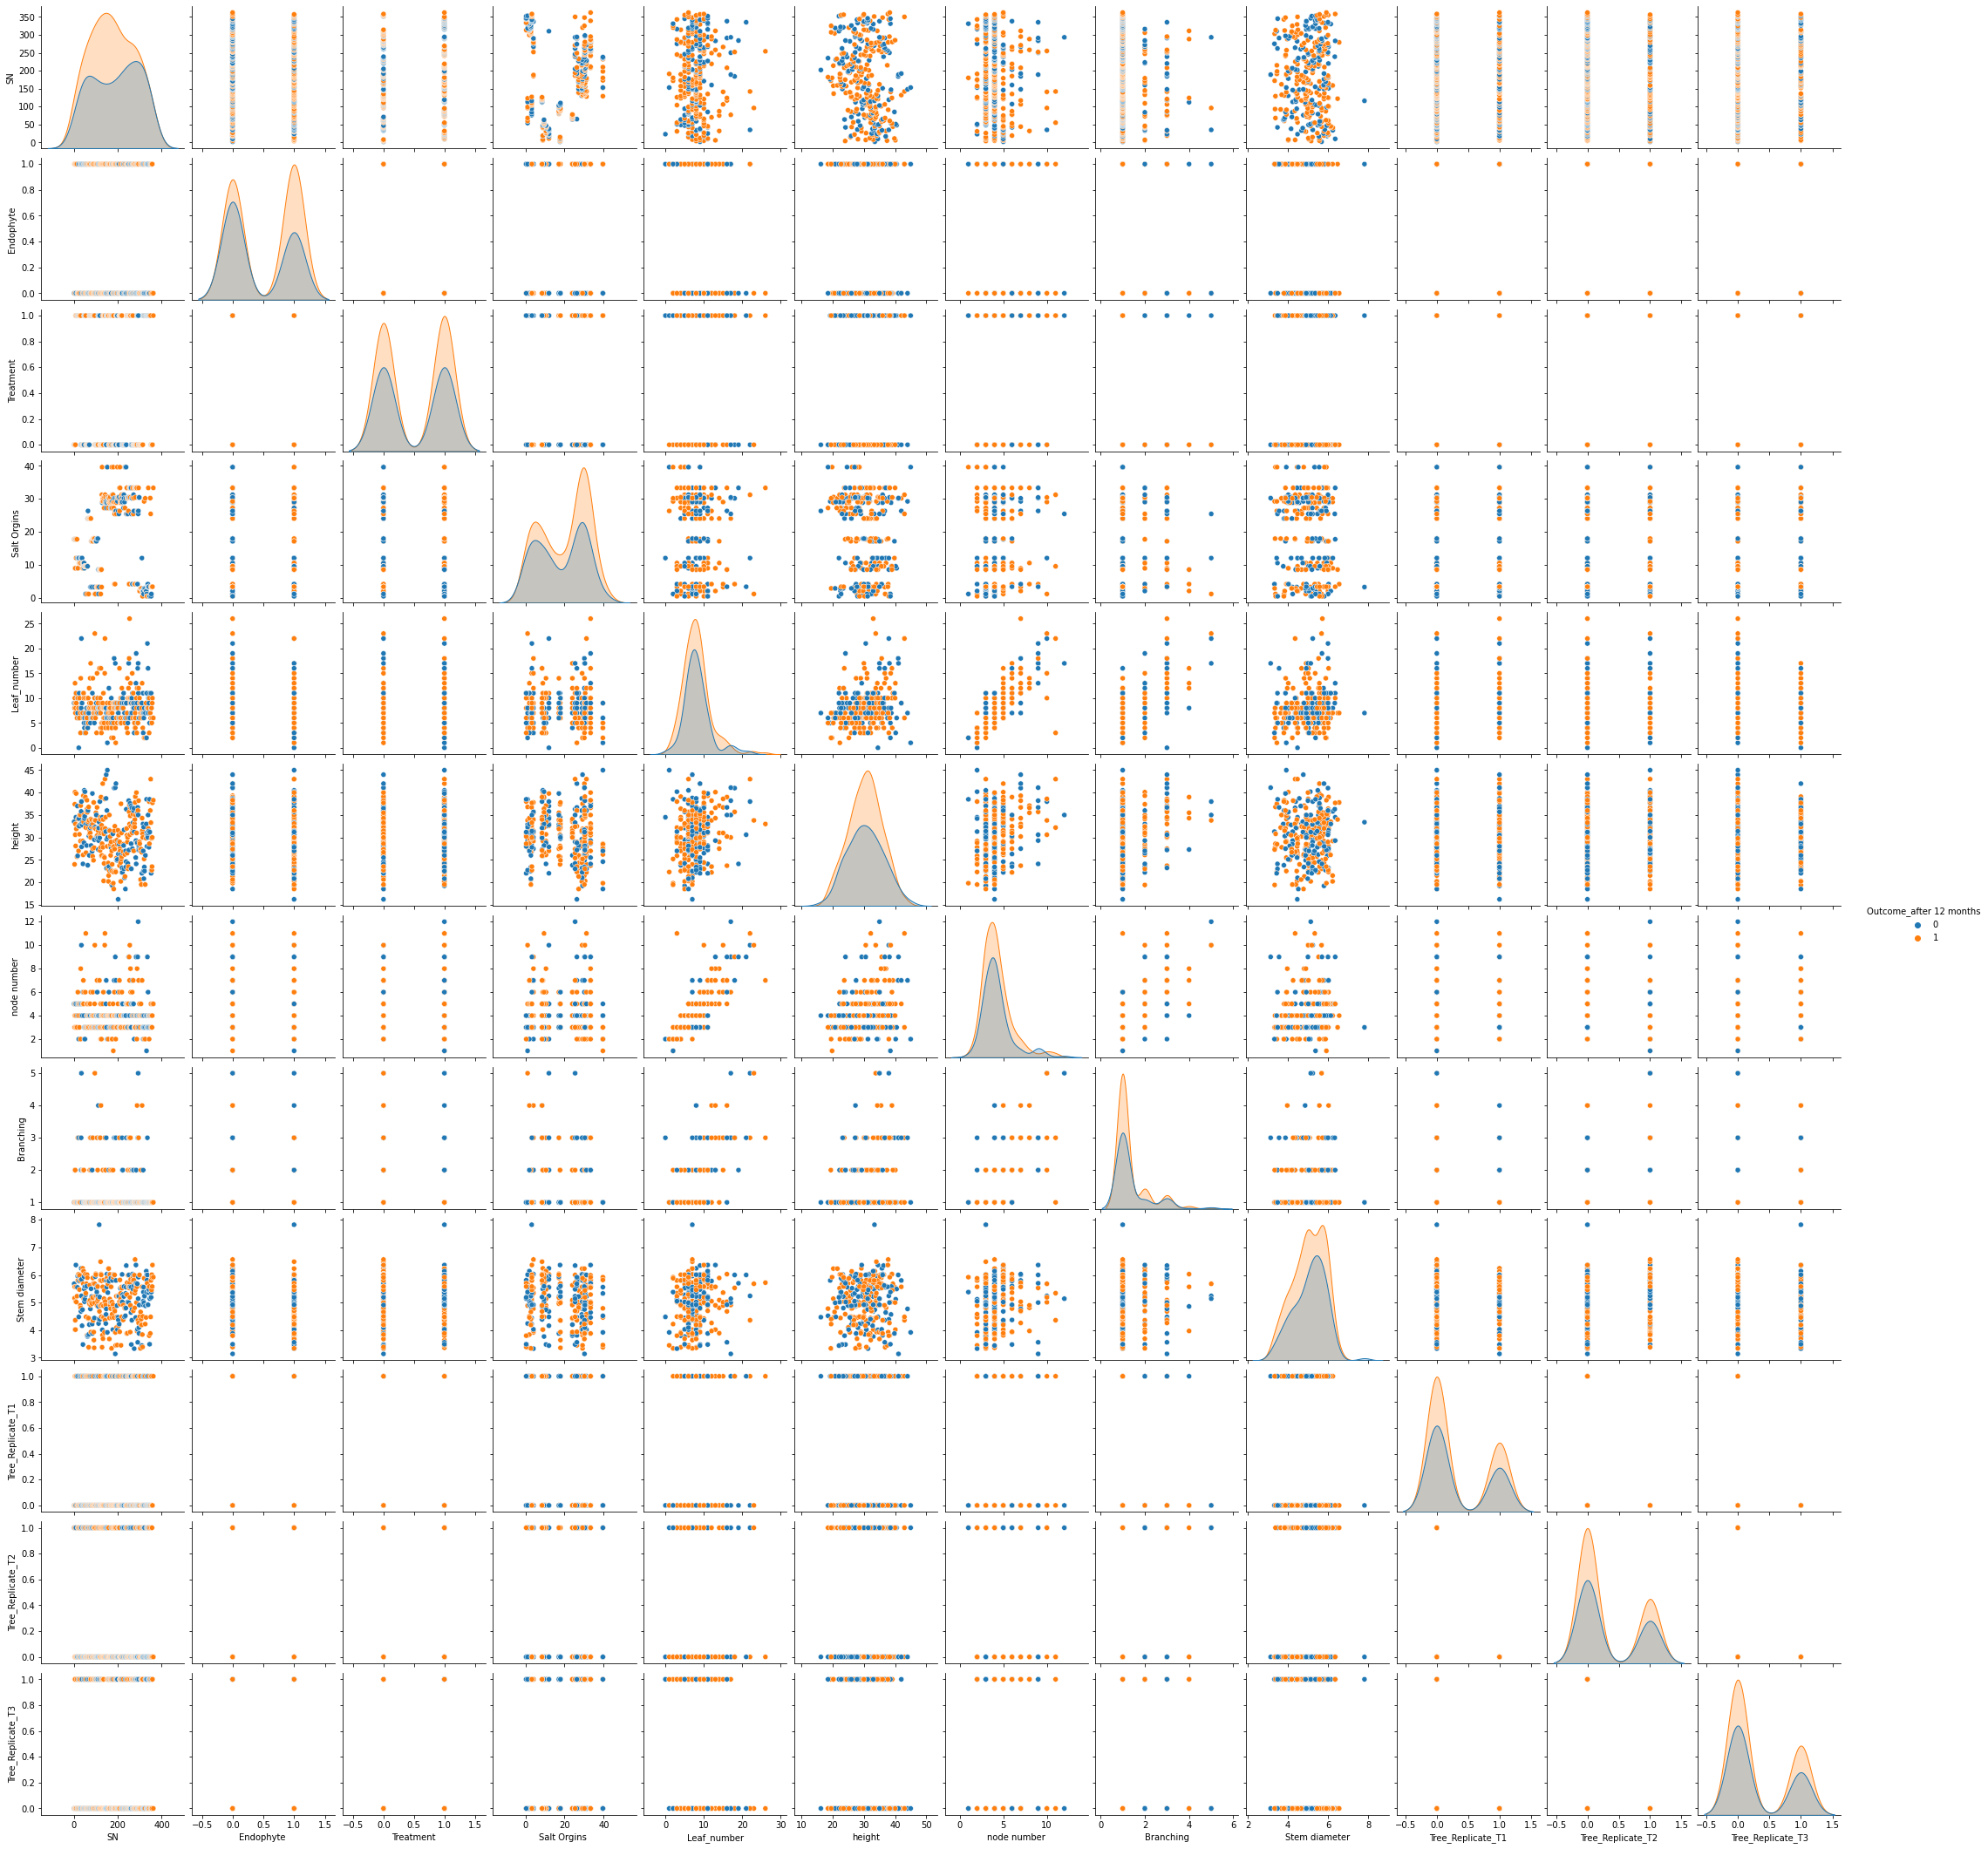

In [ ]:
import seaborn as sns
sns.pairplot(data=df, hue='Outcome_after 12 months')

In the pairplot, we can find that dead cases is more than survived cases. It seems that SN, Salt Orgins, height, Treatment, Stem diameter and Leaf_number are better than other features.

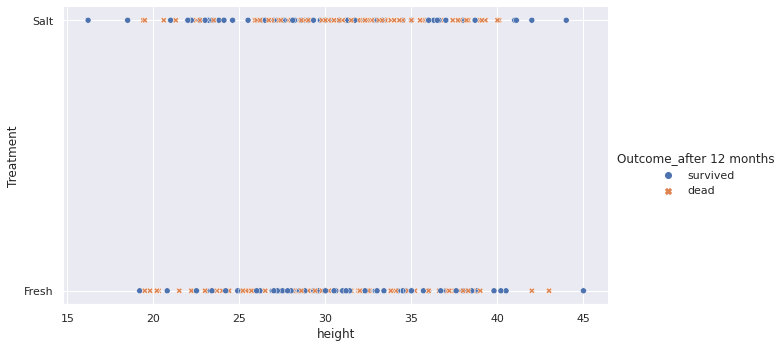

In [ ]:
sns.set_theme()
sns.relplot(x='height', y='Treatment', hue='Outcome_after 12 months',style='Outcome_after 12 months' ,data=df, kind='scatter',aspect=16/9, height=5)

# kNN

In [ ]:
# Using Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

n_neighbors = 10
steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
print(accuracy_score(y_pipe, y_test))

0.765625


We can see the accuracy score of this model is 76.56%

Choosing the K value

In [ ]:
# Using GridSearchCV model to choose one k value be used in our model
from sklearn.model_selection import GridSearchCV, cross_val_score
n_list = list(range(1, 101))
parameters = dict(knn__n_neighbors=n_list)
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)
print(clf.best_estimator_.get_params()["knn__n_neighbors"])

7


The best K value in this case is 7

In [ ]:
cv_scores = cross_val_score(clf.best_estimator_, X, y, cv=5)
print(np.mean(cv_scores))

0.7397817460317461


From this result, in this case the best k is 7. The corresponding cross-validation score is 73.98%

Feature: 0, Score:0.271012
Feature: 1, Score:0.101806
Feature: 2, Score:0.462994
Feature: 3, Score:0.000000
Feature: 4, Score:0.095443
Feature: 5, Score:0.000000
Feature: 6, Score:0.068745
Feature: 7, Score:0.000000
Feature: 8, Score:0.000000
Feature: 9, Score:0.000000
Feature: 10, Score:0.000000


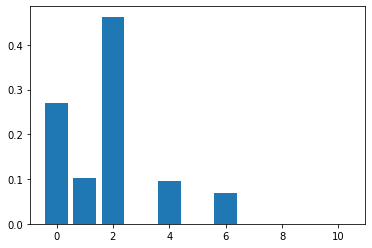

In [ ]:
importance = grid_search_cv.best_estimator_.feature_importances_
for i, V in enumerate(importance):
  print('Feature: %0d, Score:%5f' % (i,V))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

params = {'min_samples_split': list(range(2, 5)),
          'max_leaf_nodes': list(range(2, 50))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                              params, verbose=1, cv=3)
#Use grid search find the best min sample split and max leaf nodes
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score

clf = grid_search_cv.best_estimator_
#Put the best parameter in clf model
print(grid_search_cv.best_params_)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)
#calculate the accuracy rate about this model

{'max_leaf_nodes': 8, 'min_samples_split': 2}


0.609375

Now you can see that for this plants dataset, the best decision tree should have at most 8 leaf nodes and the minimum number of samples required to be at a leaft node is 2. The fitted decision tree can get 60.94% accuracy on the test set.

Plot the Decision Tree

<function matplotlib.pyplot.show(*args, **kw)>

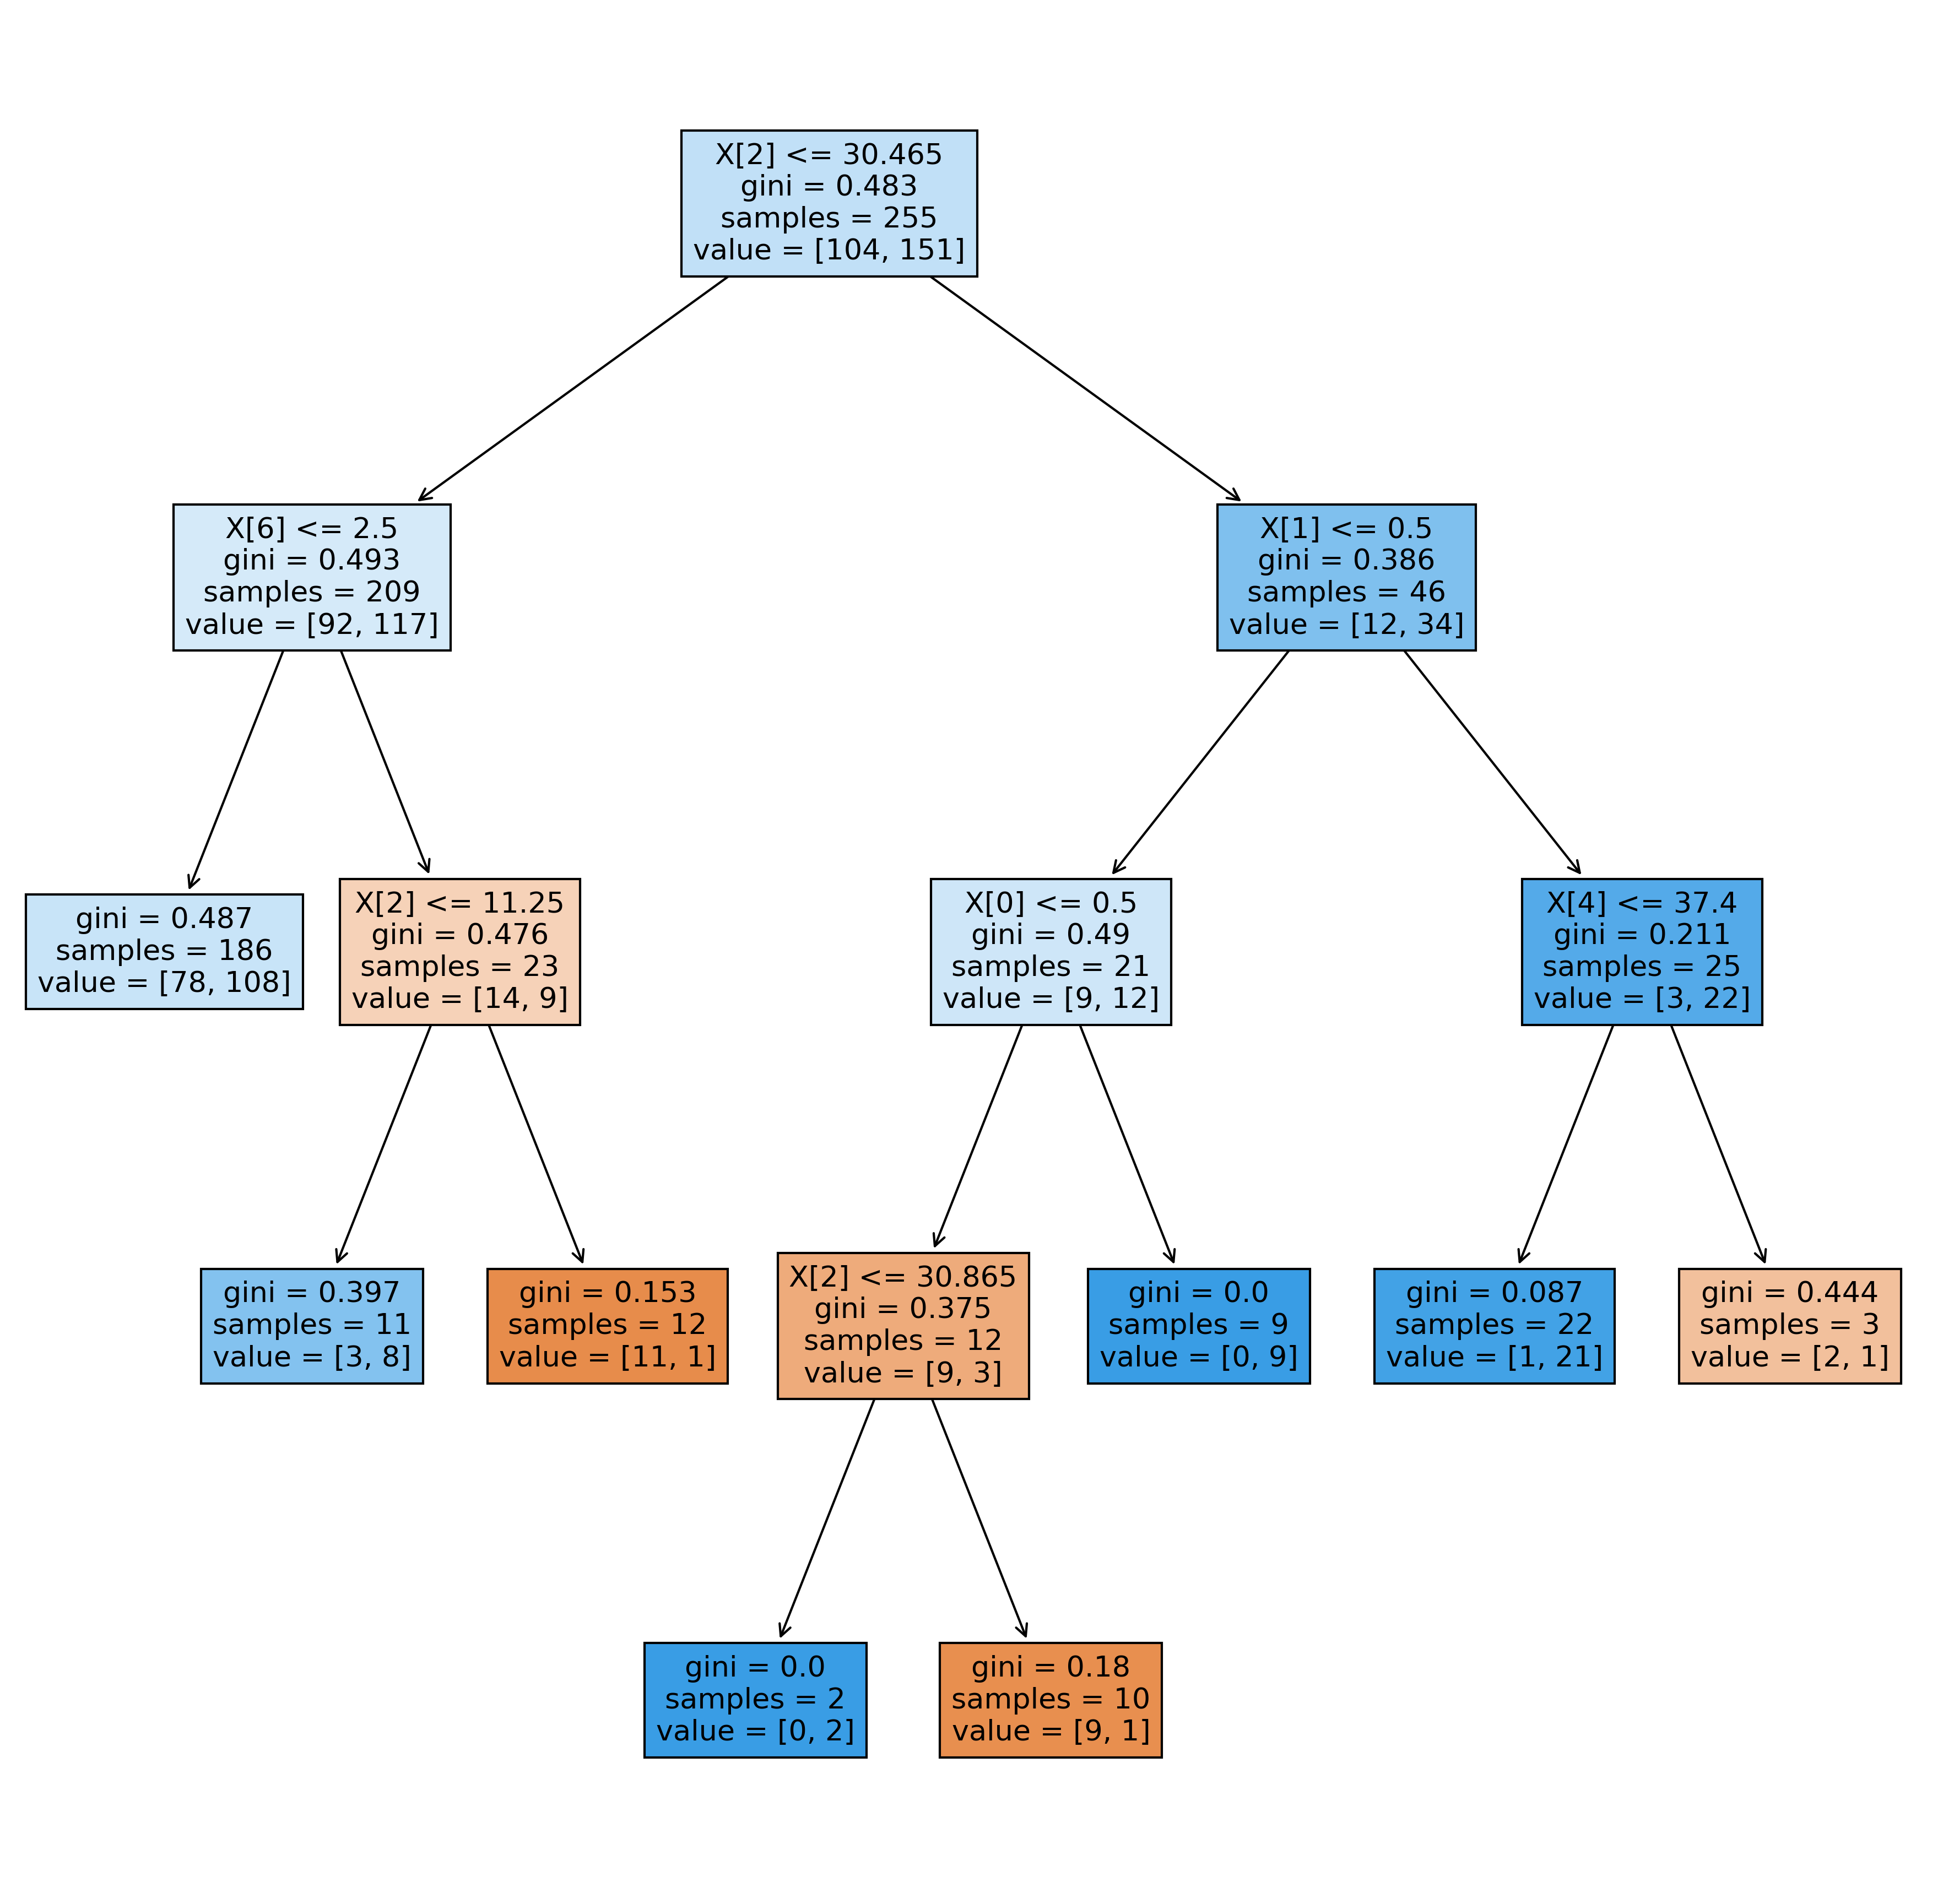

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15), dpi=300)
tree.plot_tree(clf, filled=True)
plt.show

In the plot of Deciosn Tree, you can see that there are only use 5 importmant features in the mdoel.

# **Conclusion**
In this project, we analyzed a plant dataset using kNN and decision tree models. After preprocessing the data, we identified the most important features and used pair plots and scatter plots to gain insights into the dataset. We used GridSearchCV to tune hyperparameters and evaluated the models using accuracy score and cross-validation.

Based on our analysis, we found that kNN outperformed the decision tree model with an accuracy of 76.56% and a cross-validation score of 73.98%. However, we acknowledge that accuracy may not be the best metric for evaluating the model's performance when the classes are imbalanced. Therefore, we recommend using other metrics like precision, recall, F1 score, and ROC-AUC to evaluate the model's performance.

In conclusion, we believe that our analysis provides valuable insights into the plant dataset and highlights the importance of feature selection, model selection, hyperparameter tuning, and evaluation metrics in data science. We also recommend further experimentation with other models, data preprocessing techniques, and ensemble methods to optimize the model's performance.